In [ ]:
import numpy as np
data = np.array([[3.87,2.65,0],
                 [2.64,3.63,0],
                 [4.93,5.50,0],
                 [2.83,2.95,0],
                 [4.07,4.00,0],
                 [8.27,3.57,1],
                 [6.36,3.09,1],
                 [7.99,2.97,1],
                 [9.76,1.42,1],
                 [8.76,4.60,1]])
print(data)

[[3.87 2.65 0.  ]
 [2.64 3.63 0.  ]
 [4.93 5.5  0.  ]
 [2.83 2.95 0.  ]
 [4.07 4.   0.  ]
 [8.27 3.57 1.  ]
 [6.36 3.09 1.  ]
 [7.99 2.97 1.  ]
 [9.76 1.42 1.  ]
 [8.76 4.6  1.  ]]


In [ ]:
#function for logistic regression
def predict(data_row,coef):
  yhat = coef[0] + coef[1]*data_row[0] + coef[2]*data_row[1]

  return 1/(1+exp(-yhat))

In [ ]:
from math import exp

coef = [0.32,0.24,1.80]

for row in data:
  print(row[2] , predict(row,coef) , round(predict(row,coef)))

0.0 0.9975733161708107 1
0.0 0.9994403280942834 1
0.0 0.9999888404079871 1
0.0 0.998183816277212 1
0.0 0.9997959211460183 1
1.0 0.9998384929107746 1
1.0 0.9993942274401454 1
1.0 0.9994915321639845 1
1.0 0.994613187134525 1
1.0 0.9999775096108892 1


#Error Optimization

In [ ]:
for iter in range(500):
  sum_error = 0
  for row in data:
    lr = 0.1
    z = predict(row,coef)
    error = row[2] - z
    sum_error += error**2

    coef[0] = coef[0] + lr * 2 * error * z * (1-z)
    coef[1] = coef[1] + lr * 2 * error * z * (1-z) * row[0]
    coef[2] = coef[2] + lr * 2 * error * z * (1-z) * row[1]

  print(iter,sum_error)

0 4.989940913374076
1 4.989730500796284
2 4.989511292542216
3 4.989282743644355
4 4.989044265190888
5 4.988795220084662
6 4.988534918349009
7 4.988262611932835
8 4.987977488964431
9 4.987678667400895
10 4.987365188019059
11 4.987036006694585
12 4.98668998591999
13 4.986325885520938
14 4.985942352545581
15 4.985537910327076
16 4.9851109467584305
17 4.984659701877725
18 4.984182254947608
19 4.983676511336543
20 4.983140189683536
21 4.982570810070893
22 4.981965684262045
23 4.9813219095097105
24 4.980636368031161
25 4.979905735008006
26 4.979126498910113
27 4.978294999047446
28 4.977407486431879
29 4.976460215066338
30 4.97544957123331
31 4.974372247438448
32 4.973225464086704
33 4.972007233834107
34 4.970716648493754
35 4.969354144207683
36 4.967921667113481
37 4.966422623949889
38 4.9648614745608395
39 4.963242832914005
40 4.961570023570189
41 4.959843210008966
42 4.958057436589501
43 4.956201097063086
44 4.954255308367539
45 4.9521943540865845
46 4.949986885178711
47 4.947597201942308


In [ ]:
print(coef)

[-1.956435770645491, 2.2549598782071163, -3.2325699109664674]


In [ ]:
for row in data:
  print(row[2] , predict(row,coef) , round(predict(row,coef)))

0.0 0.14233241692308557 0
0.0 0.0004359397536825851 0
0.0 0.00018067715834069095 0
0.0 0.005994022171758898 0
0.0 0.0033049328736301634 0
1.0 0.994244389025422 1
1.0 0.9165575763090088 1
1.0 0.9984375882442253 1
1.0 0.9999998072214199 1
1.0 0.9491743412670172 1


#Using logistic regression for classification based problem

In [ ]:
from sklearn.datasets import load_breast_cancer
df = load_breast_cancer()

In [ ]:
df.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
df['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
import pandas as pd
X = pd.DataFrame(df['data'],columns=df['feature_names'])

In [ ]:
Y = df['target']

In [ ]:
df['target_names']

array(['malignant', 'benign'], dtype='<U9')

In [ ]:
#Train and test split
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y)

In [ ]:
from sklearn.linear_model import LogisticRegression
lmodel = LogisticRegression()

In [ ]:
lmodel.fit(xtrain,ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
print(lmodel.score(xtrain,ytrain))
print(lmodel.score(xtest,ytest))

0.9342723004694836
0.972027972027972


In [ ]:
print(lmodel.predict([xtest.values[35]]))

[1]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
print(df['target_names'][lmodel.predict([xtest.values[35]])])

['benign']


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
print(ytest[35])

1


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(ytrain,lmodel.predict(xtrain))

array([[139,  18],
       [ 10, 259]])

In [ ]:
confusion_matrix(ytest,lmodel.predict(xtest))

array([[53,  2],
       [ 2, 86]])

#Compare the model performance created using logistic regression with KNN, DTC and Random Forest Model using confusion matrix

In [ ]:
ypred_prob = lmodel.predict_proba(xtest)[:,1:2]
ypred_prob

array([[1.98937933e-02],
       [5.16451189e-07],
       [1.39353698e-06],
       [6.20882480e-13],
       [1.05191422e-03],
       [9.94317794e-01],
       [1.50805779e-03],
       [9.99477321e-01],
       [8.33821122e-01],
       [9.97292331e-01],
       [9.91795457e-01],
       [1.08483412e-01],
       [6.30822463e-08],
       [9.96825670e-01],
       [9.91315423e-01],
       [9.98020780e-01],
       [9.97608114e-01],
       [9.36831324e-03],
       [7.04025890e-08],
       [9.99832082e-01],
       [8.15356387e-01],
       [9.93249125e-01],
       [8.94279698e-01],
       [3.04457549e-01],
       [7.49894053e-01],
       [8.94026216e-01],
       [9.98595322e-01],
       [6.55816274e-01],
       [9.88392135e-01],
       [2.66018181e-02],
       [9.92401345e-01],
       [2.24228839e-03],
       [9.99397496e-01],
       [9.59340268e-01],
       [9.77042085e-01],
       [9.25892768e-01],
       [3.16534828e-03],
       [9.95293209e-01],
       [9.07614053e-01],
       [9.94506055e-01],


In [ ]:
from sklearn.metrics import roc_curve,roc_auc_score

In [ ]:
auc = roc_auc_score(ytest,ypred_prob)
print(auc)

0.9954545454545455


In [ ]:
fpr,tpr,thresh = roc_curve(ytest,ypred_prob)

In [ ]:
print(fpr)

[0.         0.         0.         0.01818182 0.01818182 0.03636364
 0.03636364 0.12727273 0.12727273 0.2        0.2        1.        ]


In [ ]:
print(tpr)

[0.         0.01136364 0.94318182 0.94318182 0.96590909 0.96590909
 0.97727273 0.97727273 0.98863636 0.98863636 1.         1.        ]


In [ ]:
print(thresh)

[1.99983208e+00 9.99832082e-01 7.49894053e-01 7.33439564e-01
 7.01689601e-01 6.55816274e-01 5.63070041e-01 3.04457549e-01
 1.66130068e-01 4.54183222e-02 3.80260837e-02 7.01449161e-20]


In [ ]:
#TPR >> Maximum , FPR >> Minimum
#TPR * (1-FPR) >>> Maximum

g_val = tpr * (1-fpr)
print(g_val)
print(g_val.max())
print(g_val.argmax())

[0.         0.01136364 0.94318182 0.92603306 0.94834711 0.93078512
 0.94173554 0.85289256 0.86280992 0.79090909 0.8        0.        ]
0.9483471074380165
4


In [ ]:
#KNN

from sklearn.neighbors import KNeighborsClassifier
kmodel = KNeighborsClassifier()

kmodel.fit(xtrain,ytrain)

ypred_knn = kmodel.predict_proba(xtest)[:,1:2]

auc_knn = roc_auc_score(ytest,ypred_knn)
print(auc_knn)

fpr_k,tpr_k,thresh_k = roc_curve(ytest,ypred_knn)

g_val_k = tpr_k * (1-fpr_k)
print(g_val_k.argmax())

0.9860537190082646
3


In [ ]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rmodel = RandomForestClassifier(max_depth=4)

rmodel.fit(xtrain,ytrain)

print(rmodel.score(xtrain,ytrain))
print(rmodel.score(xtest,ytest))

ypred_rfc = rmodel.predict_proba(xtest)[:,1:2]

auc_rfc = roc_auc_score(ytest,ypred_rfc)
print(auc_rfc)

fpr_r,tpr_r,thresh_r = roc_curve(ytest,ypred_rfc)

g_val_r = tpr_r * (1-fpr_r)
print(g_val_r.argmax())

0.9882629107981221
0.9440559440559441
0.9931818181818183
4


In [ ]:
print(thresh_k[3])

0.6


In [ ]:
print(thresh_r[4])

0.7049739400601215


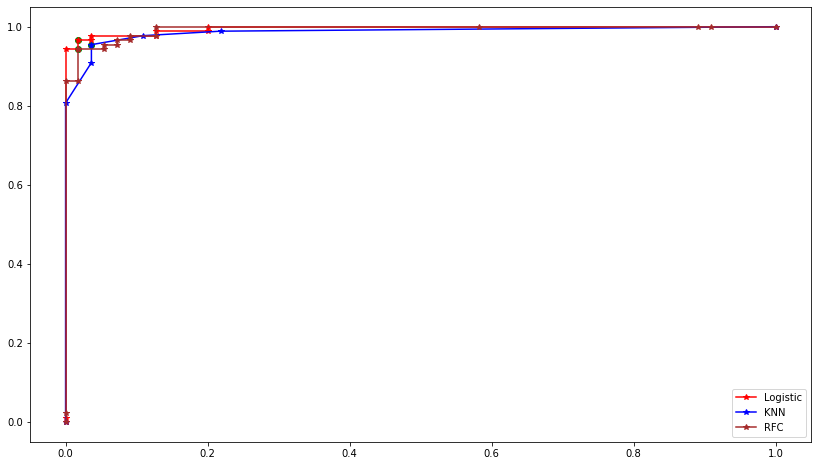

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,8))

plt.plot(fpr,tpr,marker='*',c='r',label = 'Logistic')
plt.scatter(fpr[4] , tpr[4] , color='g')

plt.plot(fpr_k,tpr_k,marker='*',c='b',label = 'KNN')
plt.scatter(fpr_k[3],tpr_k[3],color='g')

plt.plot(fpr_r,tpr_r,marker='*',c='brown',label = 'RFC')
plt.scatter(fpr_r[4],tpr_r[4],color='g')

plt.legend()
plt.show()

In [ ]:
print(lmodel.predict([xtest.values[5]]))

[1]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
print(lmodel.predict_proba([xtest.values[5]]))

[[0.00568221 0.99431779]]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
